## Project Challenge: Exploratory and predictive analytics upon the household market of Santiago de Chile, based on geo-spatial data, zone and area characteristics

### **_by Sebastian Sbirna (s190553), Blanca Robledo Diaz (s174437) and Shalaka Patil (s191471)_**

---
## _Notebook 2/2: Applied Machine Learning for predictive analytics_
---
## Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Review of modeling versions</u>](#review)
- [Part 3: <u>Defining the scoring methods</u>](#scoring)
- [Part 4: <u>Data Preparation for modeling</u>](#dataprep)
- [Part 5: <u>Classification using Logistic Regression</u>](#logreg)
- [Part 6: <u>Classification using Decision Trees (through Random Forest)</u>](#rndfst)
- [Part 7: <u>Classification using Neural Networks</u>](#nn)
- [Part 8: <u>Conclusion</u>](#ending)
---

<a id='intro'></a>
## Part 1: _<u>Introduction</u>_

In the previous notebook, we have explored our dataset with carefulness, answering some essential questions regarding the household market of Santiago de Chile. Also, we have taken a step further by augmenting our dataset through, among others, the proper use of the OpenStreetMaps API to check for points of interest in the vicinity of each house.

Now, let us use everything that we have learned so far about the data in order to accomplish the initial task of our project: ___performing a classification of which household type would buy a house in selected parts of Santiago.___

We will use Machine Learning algorithms intended for Supervised Learning. The specific algorithms that we will use (Logistic Regression, Decision Trees, and Neural Networks) will be presented, step by step in this notebook, along with their predictive results through the usage of appropriate evaluation metrics (_F1-score/precision&recall, categorical accuracy)._

For each of the ML algorithms used, we will first explain how we prepare the data for input into the algorithm, after which we will detail the workings of the trained model and the best-practice measures which we have used in achieving representative score results.

---

<a id='review'></a>
## Part 2: _<u>Review of modeling versions</u>_

In this notebook, we would like to guide our readers in understanding how multiclass supervised machine learning algorithm practices were conducted upon our task at hand. 

___What you will see in this notebook is a clean, fluid version of the workflow of ML modeling.___ _Yet, behind the scenes, we could not arrive at the "fluidity" seen here without performing multiple cycles of MODELING --> RESULTS --> OPTIMIZE/SELECT MOST RELEVANT DATASET FEATURES --> MODELING --> RESUlTS --> ADD/CREATE MORE RELEVANT FEATURES TO THE DATASET --> MODELING --> RESULTS --> ..._.

In total, there were 7 different versions of our dataset that we have continously prepared, inputted, tested and optimized in our "backstage" research about how to tackle this complex mobility problem most efficiently. From having spread our code and analysis over 3 full, large notebooks, we have understood that it is not reasonable, relevant or "beautiful" to include all the analysis done upon the 7 dataset versions into this final presentation notebook, since the analysis required mostly the same code as will be presented here, except slightly tweaked variations of the same processing, with the hope of producing more accurate results. This did not turn out to be the case, probably due to the massive complexity of our task, and each of the versions ended up ___giving $\pm$ 1-2% changes in accuracy or F1 scoring.___

For reference, we will outline here the 7 different manipulations used upon our dataset, along with their specific additions:

* ___Version 1:___ Includes all ___non-household-related___ variables of our dataset. The 4 categorical variables: _Sector, No_in_Cluster_2, No_in_Cluster_7_ and _Zone_Name_ have been one-hot-encoded, giving this dataset a high dimensionality (when PCA was not applied). Highly-correlated variables have NOT been removed from the dataset. The OpenStreetMaps data was not added at this point. This dataset has been tested both with and without PCA applied upon the numerical variables.

* ___Version 2:___ Same as Version 1,  with the addition that all the categorical variables have been ___dropped___ instead of being one-hot encoded. ___This has been done since we have realized that none of our 4 categorical variables could contribute well to the training of a non-overfitted model.___ More specifically, from a geographical point of view, most of the Zones within the test set cannot be found within the training set, since our test set is bounded geographically. The other categorical variables were dropped in an attempt to reduce the dimensionality of the data without needing to apply PCA. It was not necessary to do so, we were simply experimenting with the models. The OpenStreetMaps data was not added at this point. This dataset has been tested both with and without PCA applied upon the numerical variables.

* ___Version 3:___ Same as Version 2, with the addition that ___all of the multicollinear variables (which were correlated at the same time) have been dropped, including 9/10 Accessiblity variables___ (since the analysis performed in the previous notebook has shown us that most of the Accessiblity variables were actually showing the same data pattern. This has greatly reduced the dimensionality of the dataset. The OpenStreetMaps data was not added at this point. This dataset has been tested both with and without PCA applied upon the numerical variables.

* ___Version 4: (for experimenting purposes only!)___ Since we noticed that our models had strong difficulty to predict the correct household classes from the given training and testing dataset given, we have decided to check and compare the results of our model within ___low difficulty predictive conditions___, where we included in the modeling dataset all the variables related to household information, such as average income or years of education. As expected, our models have begun to perform extremely well on predictions from validation sets taken from the initial training data, however it was interesting to notice that even this type of model had minimal improvement in accuracy (_~57.03% accuracy_) when it came to predictions upon the test data. Most likely, this is because the data from the test is largely different in terms of combined values of all attributes, since we are testing on data from the central area of Santiago city, compared to the training data which is collected within the outer suburbs and from the neighboring regions of Santiago. The model overfitted the problem on our training data with its specific properties, however it could not adapt further to the test data. __This experiment shows us that the data from the training and testing tests is widely dissimilar in distribution.__ The OpenStreetMaps data was not added at this point. 

* ___Version 5: (for experimenting purposes only!)___ Taking Version 4 one step further, ___we wanted to check what the minimum error of an ML algorithm would be upon our dataset.___ Thus, we have disregarding the geospatial separation between the data from training and testing, and have both trained and also tested the models on the full data. This means that we have tested the models on the same data that we have trained them upon, which is clearly not good practice, however we have tried to do this experiment to understand what would be the minimum error to expect from models in our conditions, even if everything is available to them. As expected, the models performed really well this time, however, in with this situation, there was an error of ~5.88% (_i.e. 94.22% accuracy_) for predicting results. __This experiment shows us that the problem we are working with is indeed of a complex nature, and adding more relevant features into our dataset could explain more of the variation of our data.__ The OpenStreetMaps data was not added at this point. 

* ___Version 6:___ In Version 6 and 7, ___we experimented with adding more features to the initial dataset by using the power of the OpenStreetMaps API.___ You have probably seen already how we have performed this data augmentation process in Notebook 1 of our analysis. Even though this step is presented in this project as occuring before the ML modeling begins, in reality we have added this data late in the analysis process, after we have concluded that our current variables were not enough to achieve accurate predictions of the problem. Sadly, we have quickly realized that even these additional variables only brought a ___+1.00% improvement to___ our accuracy scores overall, and the F1 scores remained largely similar as well. In version 6, we have __added the number of _Churches, libraries, supermarkets, cinemas and malls_ within a radius of 0.1', approximatively 11.4km around the household.__ 

* ___Version 7:___ Version 7 simply builds upon Version 6 and adds more features related to points of interest, based on the power of OpenStreetMaps API. ___The additional variables refer to the number of bars and pubs, schools, restaurants, parks and industry locations.___

Since all of the non-experimental dataset versions have given minimal (close to none) increase in the result scoring, for this notebook, we have compiled a version of our dataset that balances dimensionality with prediction power.

---

<a id='scoring'></a>
## Part 3: _<u>Defining the scoring methods</u>_

### _Part 3.1: Establishing a baseline for model accuracy comparison_

Before starting any complex work in the realm of Supervised Learning and being happy or sad about the prediction scoring of our models, we need to understand what exactly are we comparing these scores against. 

It is not reasonable to compare e.g. accuracy scores in prediction to the 0% threshold, since even pure random-guessing will still allow you to correctly guess _some_ fraction of the total entries. Instead, let us think about a logical baseline. One that is reasonable (and also highly used in literature) is the baseline where all classes are predicted as the most frequent of the classes in the dataset, therefore ensuring a safe maximization of potenial "win" situations where we have absolutely no other data available for us to guess upon. 

We will use that baseline for comparison of our two metrics used in this analysis: F1-score and accuracy.

___Let us take a look again at the distribution of our classes within our dataset:___

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show, clim, semilogx, loglog, title, subplot, grid
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn import model_selection

from scipy import stats

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Households_Data_Processed.csv', index_col = 'Household_ID')

__We will only select and use the columns which do not tell us direct information about a household's type, such as *Income* or *Education Level*. Thus, we have made a list of 'allowed' variables that we will use throughout this dataset__.

In [3]:
ML_columns = ['Sector', 'Lat', 'Lon', 'Household_Type', 'Avg_Residential_Surface_Area',
              'Avg_Construction_Quality', 'Total_Building_Density_per_Zone',
              'KM_Nearest_Subway', 'KM_Nearest_Highway', 'CBD_Travel_Time',
              'Avg_Zonal_Income', 'Commerce_Accessibility_PT',
              'Education_Accessibility_PT', 'Household_Accessibility_PT',
              'Industry_Accessibility_PT', 'Services_Accessibility_PT',
              'Commerce_Accessibility_Car', 'Education_Accessibility_Car',
              'Household_Accessibility_Car', 'Industry_Accessibility_Car',
              'Services_Accessibility_Car', 'No_in_Cluster_7', 'No_in_Cluster_2', 
              'Zone_Name', 'Zone_Area', 'Subzone_Area', 'Dataset_Density_by_Zone_Area',
              'Dataset_Density_by_Subzone_Area', 'Dataset_Coverage_of_Zone_by_Subzone',
              'Nr_churches', 'Nr_libraries', 'Nr_supermarkets', 'Nr_cinemas', 'Nr_malls',
              'Nr_bars', 'Nr_schools', 'Nr_restaurants', 'Nr_parks', 'Nr_industrial']

df = df[ML_columns]

df.Sector = df.Sector.astype('category')
df.No_in_Cluster_2 = df.No_in_Cluster_2.astype('category')
df.No_in_Cluster_7 = df.No_in_Cluster_7.astype('category')
df.Zone_Name = df.Zone_Name.astype('category')

In [4]:
print('The percentage of household type 1 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 1]) * 100 / len(df)))
print('The percentage of household type 2 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 2]) * 100 / len(df)))
print('The percentage of household type 3 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 3]) * 100 / len(df)))

The percentage of household type 1 responses in the dataset is: 37.15% of the total number of entries.
The percentage of household type 2 responses in the dataset is: 43.59% of the total number of entries.
The percentage of household type 3 responses in the dataset is: 19.26% of the total number of entries.


According to the percentages above, we can easily see that household type 2 is the most common type in our data, therefore, __the simplest baseline model would give on the overall dataset a prediction accuracy of 43.59%__ 

We are particularly interested in seeing how the models perform on the test set, and from our previous analysis, we can expect that the distribution of classes will be different in the test set than in the training set. Since we will normally not have access to the "test" data at all until after the full training of the models, _we cannot compare the accuracy received by a model during training with the "test" baseline_, yet it would be accurate to take the accuracy baseline as the frequency of the most common class _in the training set_.

Let us separate our separate our data into the training and testing data, and perform this check:

In [4]:
test_df = df[(df.Lat >= -33.5) & (df.Lat <= -33.4) & (df.Lon >= -70.7) & (df.Lon <= -70.6)]
train_df = df[df.index.isin(test_df.index) == False]

In [5]:
test_df.drop(['Lat', 'Lon'], axis = 1, inplace = True)
train_df.drop(['Lat', 'Lon'], axis = 1, inplace = True)

In [8]:
print('Within the TRAINING dataset, the percentage of household type 1 responses in the dataset is: %.2f%% of the total number of entries.' % (len(train_df[train_df.Household_Type == 1]) * 100 / len(train_df)))
print('Within the TRAINING dataset, the percentage of household type 2 responses in the dataset is: %.2f%% of the total number of entries.' % (len(train_df[train_df.Household_Type == 2]) * 100 / len(train_df)))
print('Within the TRAINING dataset, the percentage of household type 3 responses in the dataset is: %.2f%% of the total number of entries.' % (len(train_df[train_df.Household_Type == 3]) * 100 / len(train_df)))

Within the TRAINING dataset, the percentage of household type 1 responses in the dataset is: 39.63% of the total number of entries.
Within the TRAINING dataset, the percentage of household type 2 responses in the dataset is: 43.63% of the total number of entries.
Within the TRAINING dataset, the percentage of household type 3 responses in the dataset is: 16.74% of the total number of entries.


Since the training set occupies 83.5% of the total dataset, it looks normal that the distribution of classes would not deviate too much from the original numbers, since the number of dislocated entries is small and the classes were somewhat balancedly distributed from the start. __We will select our baseline accuracy to the percentage of the distribution of class(or type) 2 within the training dataset, namely 43.63%.__

In [9]:
baseline_accuracy = np.round((len(train_df[train_df.Household_Type == 2]) / len(train_df)), decimals = 3)
print('The baseline threshold for accuracy is: ', baseline_accuracy)

The baseline threshold for accuracy is:  0.436


---

### _Part 3.2: Establishing a baseline for F1-score comparison_

Computing the F1 baseline score for this dataset is slightly more complex, since this is a multiclass problem. Because we are dealing with more than 2 classes, we need to clearly define how the F1 score will be computed. 

There are three major ways to compute the global F1 score of a multiclass problem, each relying on a slightly different method of averaging the class-by-class precision and recall scores: ___micro-average F1, macro-average F1 and weighted-average F1 score___. There are advantages and disadvantages for each method, according to <u>[source 1](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1)</u>, <u>[source 2](https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/)</u> and <u>[source 3](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin)</u>.

The micro-average F1 is good for high class-imbalance datasets, since it aggregates the contributions of all classes to compute the average metric, however the potential downside is that its computed accuracy equals both its precision and also its recall, therefore the harmonic mean (_i.e. F1 score_) will also be equal to its accuracy. 

The macro-average F1 does not take into account class imbalance, however it will compute the metric independently for each class and then take the average (therefore also treating all classes equally). 

A weighted-average F1 is a variant of the macro-average F1, in which each class contribution to the average is being weighted by the relative number of examples available for it. We have selected this type of F1 metric as being most relevant to our project, since we do not have strong issues of class imbalance and also since it separates the precision and recall of each individual class, thus allowing us to have separate results for accuracy and F1 score.

**_Using the weighted macro F1 formula, we will compute the baseline in the most simple case scenario where the most frequent class is always predicted._**

We need to mention that, if this prediction strategy is constant, all precision and recall values __except__ for the highest-frequeny class will result in 0, since there will be no True Positives found (and that is the numerator of both scores' equations). The weighed average method requires us to multiply the remaining one precision and recall values by the "weight" of the high-frequency class upon the training dataset, i.e. how many entries does this class encompass, out of the total number of entries in the dataset.

In [10]:
highest_class_percentage = (len(train_df[train_df.Household_Type == 2]) * 100 / len(train_df))

# This is only the precision from the predicted class, since the other precisions are equal to 0 because there are no TPs
weighted_precision_for_most_frequent_class = highest_class_percentage * (highest_class_percentage / train_df.shape[0])

# This is only the recall from the predicted class, since the other precisions are equal to 0 because there are no TPs. 
# For the predicted class, the recall is 1 since obviously predicting the highest class will mean we will classify all its own instances correctly
weighted_recall_for_most_frequent_class = highest_class_percentage * 1

# The calculation of the F1 score is the harmonic mean of the global (macro or micro) precision and recall values
baseline_f1_weigted_macro_avg = np.round((2 * weighted_precision_for_most_frequent_class * weighted_recall_for_most_frequent_class) / (weighted_precision_for_most_frequent_class + weighted_recall_for_most_frequent_class), decimals = 3)

print('The baseline threshold for F1 score is: ', baseline_f1_weigted_macro_avg)

The baseline threshold for F1 score is:  0.255


---

### _Part 3.3: Define computationally the scoring function_

_Based on the above-mentioned considerations, we have decided to implement an evaluation function that will be used further in the testing of our models:_

In [6]:
def evaluate(y_true, y_pred, print_confusion_matrix = False, print_accuracy = False, print_error_rate = False, print_f1_score = False, use_weighted_average = True):
#     When wanting to compute MICRO-average instead of MACRO, uncomment the codes below:

#     precision_micro_average_numerator = 0
#     precision_micro_average_denominator = 0
#     recall_micro_average_numerator = 0
#     recall_micro_average_denominator = 0

    precision_macro_average = 0
    recall_macro_average = 0
    
    c_matrix = confusion_matrix(y_true, y_pred)
    
    if (print_confusion_matrix == True):
        print('Confusion matrix\n- x-axis is true labels \n- y-axis is predicted labels')
        print(c_matrix)
        print()
    
    for i in range(0, len(np.unique(y_true))):
        # From the multiclass confusion matrix, we will calculate the TP, FP and FN for each class individually, 
        # so that we can compute the precision and recall scores of each class individually
        
        tp = c_matrix[i, i]
        fp = c_matrix[0:i, i].sum() + c_matrix[i+1:, i].sum()
        fn = c_matrix[i, 0:i].sum() + c_matrix[i, i+1:].sum()
        # tn = confusion_matrix.sum() - tp - fp - fn (No need for it here to be computed)
        
#         Uncomment for MICRO-average computation:

#         precision_micro_average_numerator += tp
#         recall_micro_average_numerator += tp
#         precision_micro_average_denominator += (tp+fp)
#         recall_micro_average_denominator += (tp+fn)
        
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        
        # If the denominator of either precision or recall is 0, we need to express that the scoring becomes 0
        if (tp + fp == 0):
            precision = 0.0
        if (tp + fn == 0):
            recall = 0.0
            
        # Here is where we perform the weighting of the classes within our global F1 score
        if (use_weighted_average == True):
            # The weight is equal to the number of entries of a class divided by the total number of entries
            weight = c_matrix[i].sum() / c_matrix.sum()
            
            precision_macro_average += weight * precision
            recall_macro_average += weight * recall
        else:
            precision_macro_average += precision
            recall_macro_average += recall
            
#     Uncomment for MICRO-average computation:

#     precision_micro_average = precision_micro_average_numerator / precision_micro_average_denominator
#     recall_micro_average = recall_micro_average_numerator / recall_micro_average_denominator

#     accuracy = precision_micro_average_numerator / c_matrix.sum() # since precision_micro_average_numerator IS the sum of all TPs
#     error_rate = 1 - accuracy

    if (use_weighted_average == False):
        # If we are not using weighted average, then in the previous step, we have only summed up the precision and recall together
        # Therefore, we also need to average them here
        
        precision_macro_average = precision_macro_average / len(np.unique(y_true))
        recall_macro_average = recall_macro_average / len(np.unique(y_true))

    # Here we easily compute the accuracy and error rate from the confusion matrix
    accuracy = sum([c_matrix[i,i] for i in range(0, c_matrix.shape[0])]) / c_matrix.sum()
    error_rate = 1 - accuracy
    
    # If needed, also print the accuracy value
    if (print_accuracy == True):
        print("Accuracy: ", np.round(accuracy, decimals = 5))
        
    # If needed, also print the error rate value
    if (print_error_rate == True):
        print("Error rate: ", np.round(error_rate, decimals = 5))
    
    # The calculation of the F1 score is the harmonic mean of the global (macro or micro) precision and recall values
    f1_score = (2 * precision_macro_average * recall_macro_average) / (precision_macro_average + recall_macro_average)
    
    # If needed, also print the F1 value
    if (print_f1_score == True):
        print("F1 score: ", np.round(f1_score, decimals = 5))
    
    # Return a list having the 1st value as Accuracy and the 2nd value as the weighed-average macro F1 score
    return [np.round(accuracy, decimals = 5), np.round(f1_score, decimals = 5)]

The above function, when given the true and predicted labels in a vectorial format, it will compute the model accuracy and F1 scoring appropriate for a multiclass situation.

<a id='dataprep'></a>
## Part 4: _<u>Data Preparation for modeling</u>_

### _Part 4.1: Exploratory analysis of multicollinearity in dataset_

Before we are able to proceed into inputting the data into _sklearn's_ Logistic Regression models, we need to properly prepare it for ingestion. Let us return to our original dataset (_before separation into training and testing_), and look once again at how the numerical attributes of our dataset are correlated with each other:

In [12]:
# Casting these attributes as categories, so that they don't come into the correlation analysis
# df.Household_Type = df.Household_Type.astype('category')

# df.Sector = df.Sector.astype('category')
# df.No_in_Cluster_2 = df.No_in_Cluster_2.astype('category')
# df.No_in_Cluster_7 = df.No_in_Cluster_7.astype('category')
# df.Zone_Name = df.Zone_Name.astype('category')
# df.Lat = df.Lat.astype('category')
# df.Lon = df.Lon.astype('category')

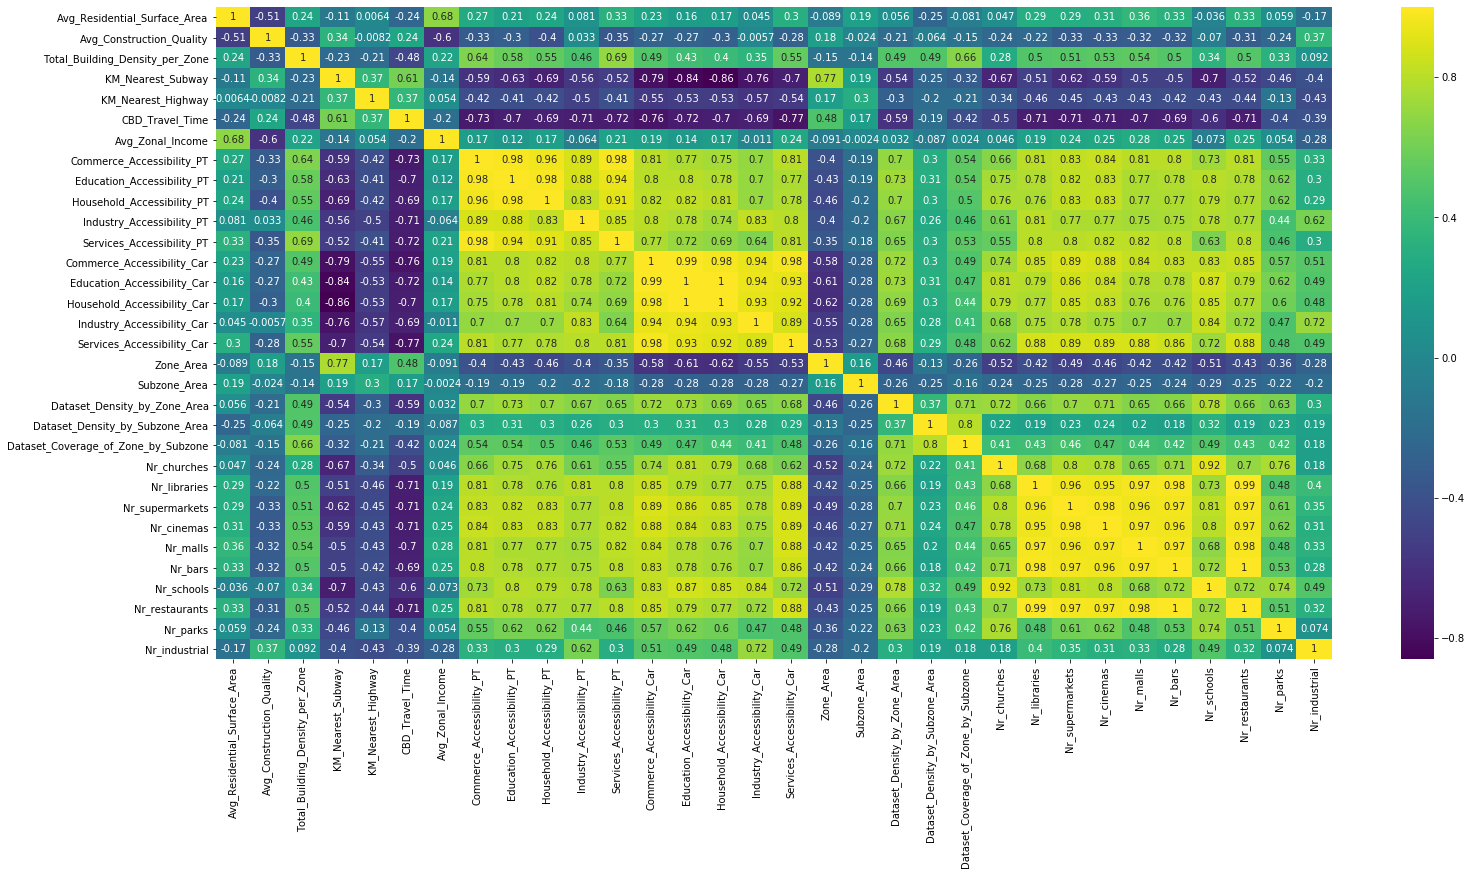

In [13]:
plt.figure(figsize = [25, 12])
sns.heatmap(df.drop(columns = ['Lat', 'Lon', 'Household_Type']).corr(), annot = True, cmap = 'viridis'); # Here we remove the categorical numerical variables, so that they don't come into the correlation analysis

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values

Very sadly, we can see that the number of variables in our model which are collinear (_i.e. one predictor can be predicted from the others_) is very large, as indicated by the large number of vivid green and vivid blue rectangles in the matrix. **Moreover, it appears that our augmented data variables from OpenStreetMaps have unfortunately not brought much to the model, as most of them are correlated, thus we would expect their predictive power to be low when put together.**

For this kind of dataset, we can argue that we are having a high dimensionality which might not however bring lots of predictive power, and it would be much better to reduce the dataset's dimensional size to a more reasonable one, while still preserving most of the variability of the attributes.

__Therefore, we argue that it is highly necessary to use a technique such as Principal Component Analysis (PCA) to reduce the multicollinearity present in this dataset's structure.__ We will choose the minimum preserved variance threshold of 95%, since this is a value which would provide a good balance between removing weak principal components and well-preserving the data's variance.

---

### _Part 4.2: Visual interpretation of predictive power of variables using a Forward Selection test_

___However, when performing PCA upon the dataset, the inner variables of data will become hard to be interpreted, since each Principal Component will be related to all the original numerical variables of the dataset.___

Before we do that and lose the interpretability upon our data, we want to better understand which attributes are very relevant for prediction within our Logistic Regression model, so that we have a better idea which variables contribute highly to our model, in a visual way.

___We mention that, after performing multiple back-stage tests upon the encoding of the categorical variables, we have realized that including the encoded Zone Names into the dataset actually hurts performance, since there are many zones in the training set which cannot geographically be found in the test set, and the models seemed to use those zone encodings to a large extent when performing fitting of the data. For the same reason, latitude and longitude will be dropped after separation of data into training and test set. The other categorical variables will stay, due to their higher likelihood of their values being found consistently, regardless of the chosen set.___ 

We are interested in discovering whether we can improve this model by reaching the same prediction power using fewer attributes. For this purpose, we perform a forward selection test with  cross-validation across five outer folds and 10 inner folds, where we train a model starting with no features and gradually select and add, one-by-one, the features which minimize the classification error in the inner cross-validation loop, up until the error cannot be minimized by adding any further predictors. 

__Let us first define the necessary functions to perform a detailed plotting of the variable selection within our experiment.__ _We will use the `feature_selector_log_reg` function, which is a modified version of a similar function created by prof. Tue Herlau from DTU Compute. We have modified `feature_selector_log_reg` and `reg_model_validate` in order to compute error rate for classification problems (since they were originally purposed for Least-Squares Regression)_.

In [14]:
def feature_selector_log_reg(X, y, cvf = 5, features_record = None, loss_record = None, display = ''):
    ''' Function performs feature selection for logistic regression model using
        'cvf'-fold cross validation. The process starts with empty set of
        features, and in every recurrent step one feature is added to the set
        (the feature that minimized loss function in cross-validation.)

        Parameters:
        X       training data set
        y       vector of values
        cvf     number of crossvalidation folds

        Returns:
        selected_features   indices of optimal set of features
        features_record     boolean matrix where columns correspond to features
                            selected in subsequent steps
        loss_record         vector with cv errors in subsequent steps
        
        Example:
        selected_features, features_record, loss_record = ...
            feature_selector_lr(X_train, y_train, cvf=10)
    ''' 
    
    y = y.squeeze()
    # first iteration error corresponds to no-feature estimator
    if loss_record is None:
        baseline_class = np.argmax([-1, len(y[y == 1]), len(y[y == 2]), len(y[y == 3])]) # -1 is there only because we want to start counting from index 1 :)
        loss_record = np.array([np.sum(y != baseline_class) / len(y)])
    if features_record is None:
        features_record = np.zeros((X.shape[1],1))

    # Add one feature at a time to find the most significant one.
    # Include only features not added before.
    selected_features = features_record[:,-1].nonzero()[0]
    min_loss = loss_record[-1]
    
    if display is 'verbose':
        print(min_loss)
        
    best_feature = False
    for feature in range(0, X.shape[1]):
        if np.where(selected_features == feature)[0].size == 0:
            trial_selected = np.concatenate((selected_features,np.array([feature])),0).astype(int)
            
            # validate selected features with logistic regression and cross-validation:
            trial_loss = reg_model_validate(X[:, trial_selected],y,cvf)
            if display is 'verbose':
                print(trial_loss)
            if trial_loss < min_loss:
                min_loss = trial_loss 
                best_feature = feature

    # If adding extra feature decreased the loss function, update records
    # and go to the next recursive step
    if best_feature is not False:
        features_record = np.concatenate((features_record, np.array([features_record[:,-1]]).T), 1)
        features_record[best_feature,-1] = 1
        loss_record = np.concatenate((loss_record,np.array([min_loss])),0)
        selected_features, features_record, loss_record = feature_selector_log_reg(X,y,cvf,features_record,loss_record)
        
    # Return current records and terminate procedure
    return selected_features, features_record, loss_record


def reg_model_validate(X, y, cvf=10):
    ''' Validate logistic regression model using 'cvf'-fold cross validation.
        The loss function computed as the error rate.

        Parameters:
        X       training data set
        y       vector of values
        cvf     number of crossvalidation folds        
    '''
    y = y.squeeze()
    CV = model_selection.KFold(n_splits = cvf, shuffle=True)
    validation_error=np.empty(cvf)
    f=0
    for train_index, test_index in CV.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        m = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', n_jobs = -1).fit(X_train, y_train)
        validation_error[f] = np.sum(y_test != m.predict(X_test))/len(y_test)
        f=f+1
    return validation_error.mean()


def bmplot(yt, xt, X):
    ''' Function plots matrix X as image with lines separating fields. '''
    plt.imshow(X,interpolation='none',cmap='bone')
    plt.xticks(range(0,len(xt)), xt)
    plt.yticks(range(0,len(yt)), yt)
    for i in range(0,len(yt)):
        plt.axhline(i-0.5, color='black')
    for i in range(0,len(xt)):
        plt.axvline(i-0.5, color='black')

Now, we will perform a quick modeling of the data to be properly inputted into the logistic regression. _We need to remember that this is not the final processing of the data, since we will need to reduce its dimensionality with PCA later on._

In [7]:
# Drop the zone name, since it hurts model performance (we tested it beforehand)
df.drop(columns = ['Zone_Name'], inplace = True)
train_df.drop(columns = ['Zone_Name'], inplace = True)
test_df.drop(columns = ['Zone_Name'], inplace = True)

# Encode the categorical variables
df = pd.get_dummies(df)
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [8]:
# Extract the modeled target variable
y = train_df.Household_Type.as_matrix()
y_final_test = test_df.Household_Type.as_matrix()

# Drop the target from dataframes, so that we can later transform the dataframes into the predictor matrixes
test_df.drop(['Household_Type'], axis = 1, inplace = True)
train_df.drop(['Household_Type'], axis = 1, inplace = True)

X = train_df.as_matrix()
X_final_test = test_df.as_matrix()

__We also need to standardize the data before performing any kind of modeling or PCA reduction, so that the scaling of the different variables will not impact their selection unequally.__

In [9]:
# Here, we will standardize the data, so that the scaling of the different variables will not impact their selection unequally
X = np.nan_to_num(stats.zscore(X))
X_final_test = np.nan_to_num(stats.zscore(X_final_test))

In [15]:
print('Size of the training dataset is: ' + str(X.shape))
print('Size of the test dataset is: ' + str(X_final_test.shape))

Size of the training dataset is: (14876, 48)
Size of the test dataset is: (2921, 48)


Here comes the interesting part: let us perform the actual forward selection of features using Logistic Regression models.

__A black square will represent that the variable has been selected as relevant for an iteration of the cross-validated logistic regression model. At each internal CV (cross-validation) fold, only one variable can be selected. That is why you can see, in the schema below, not only which variables are most important to the model, but also _in what order_ they are selected.__

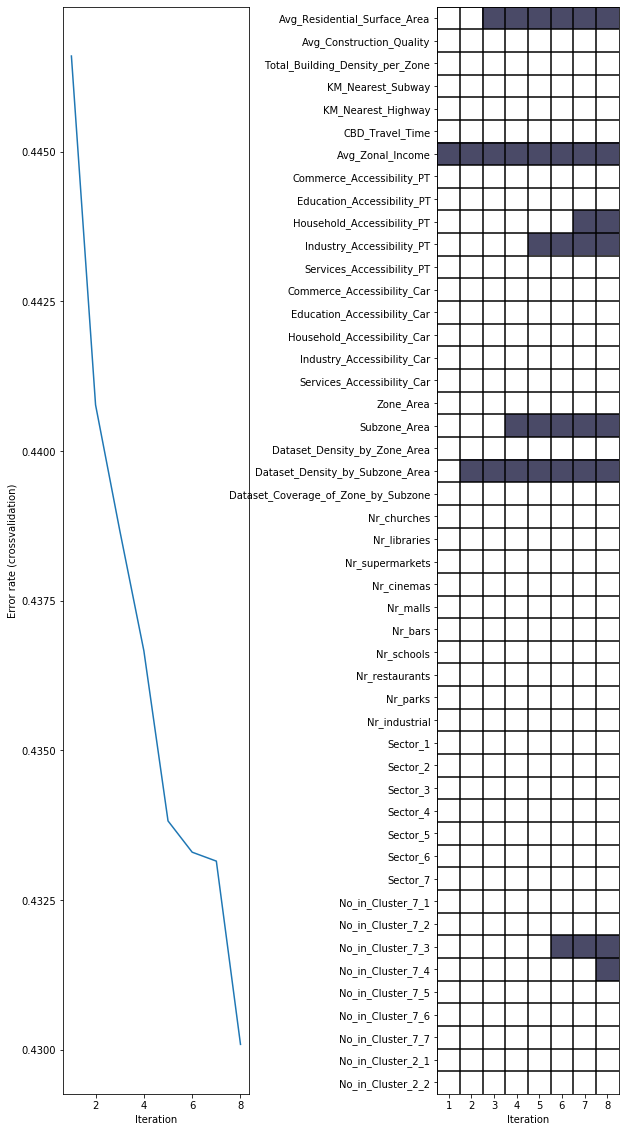

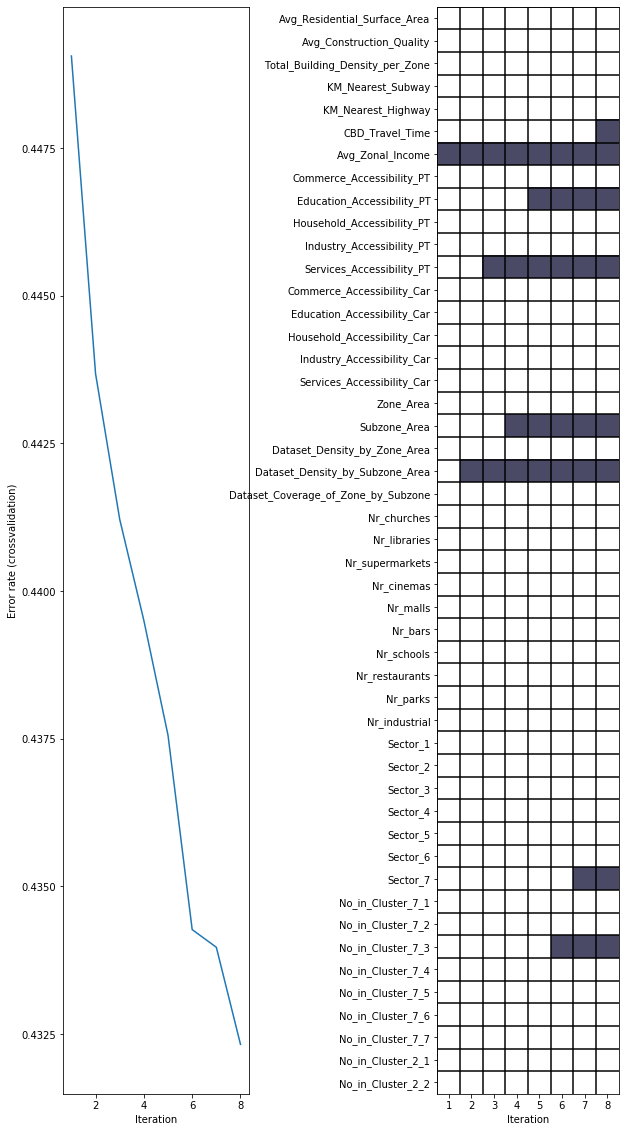

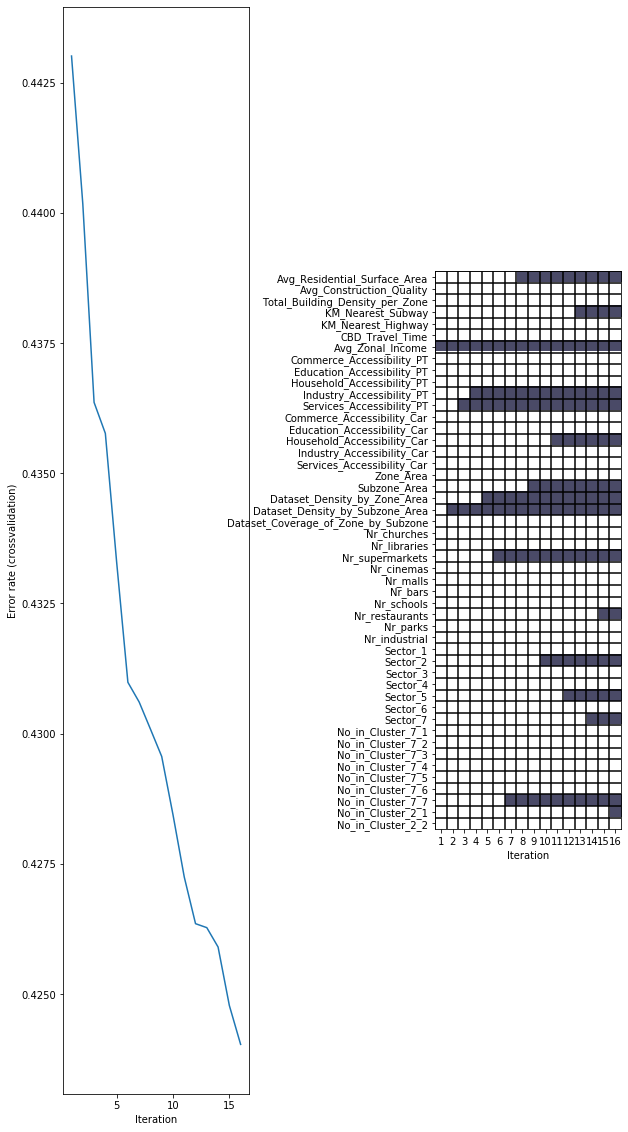

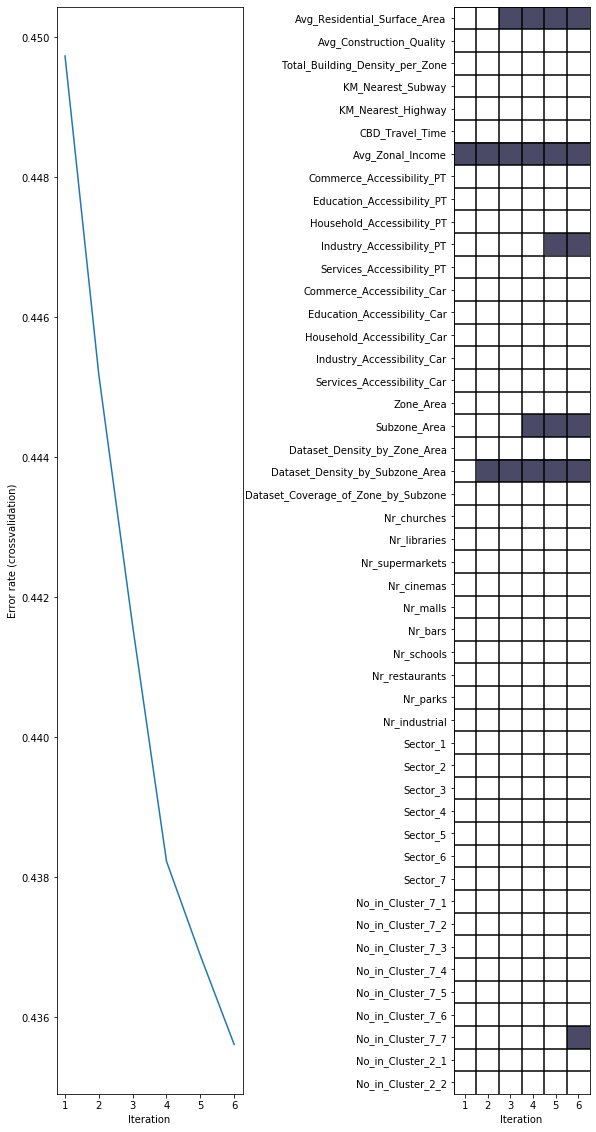

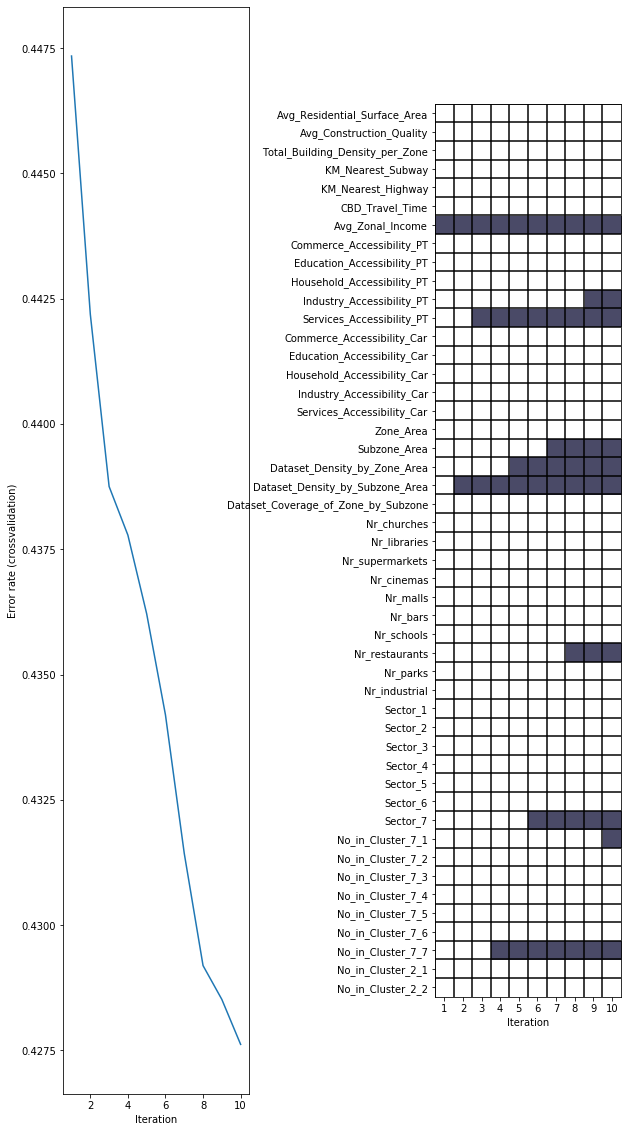

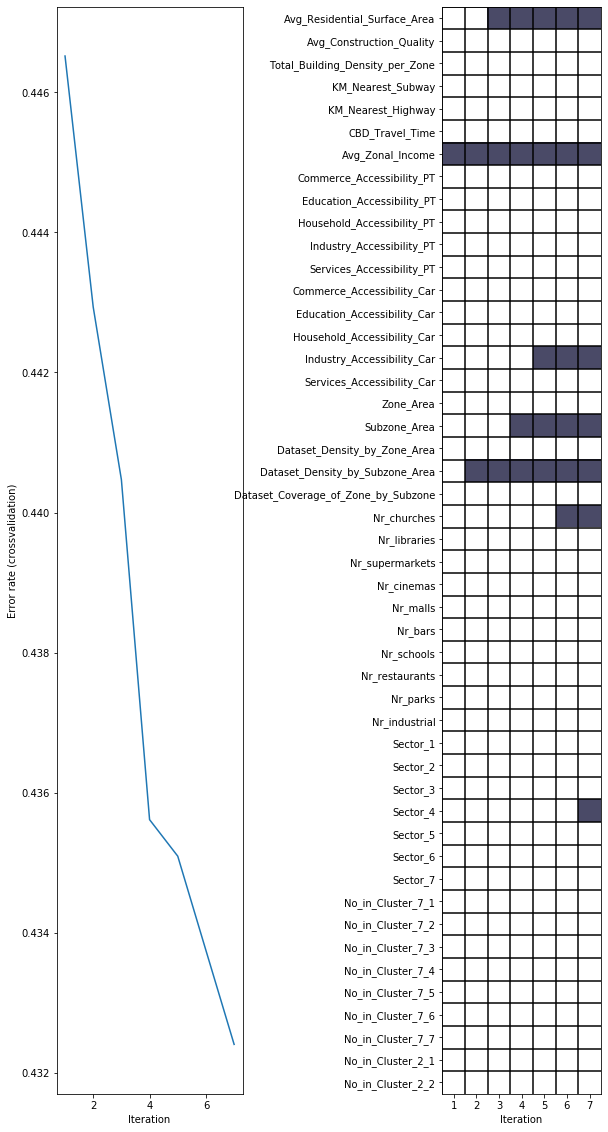

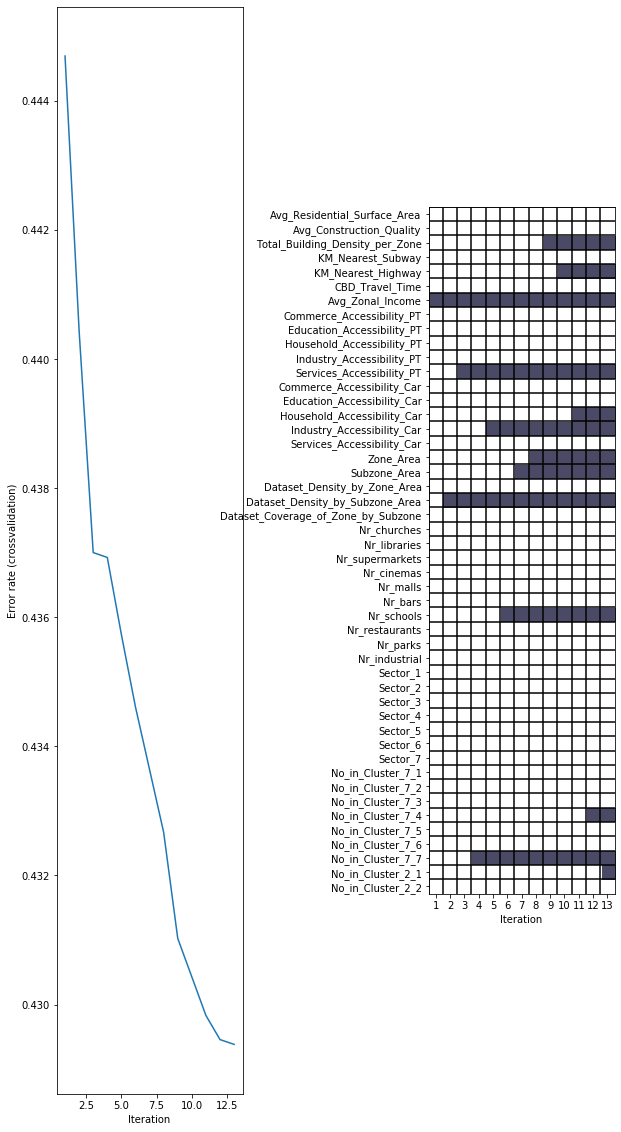

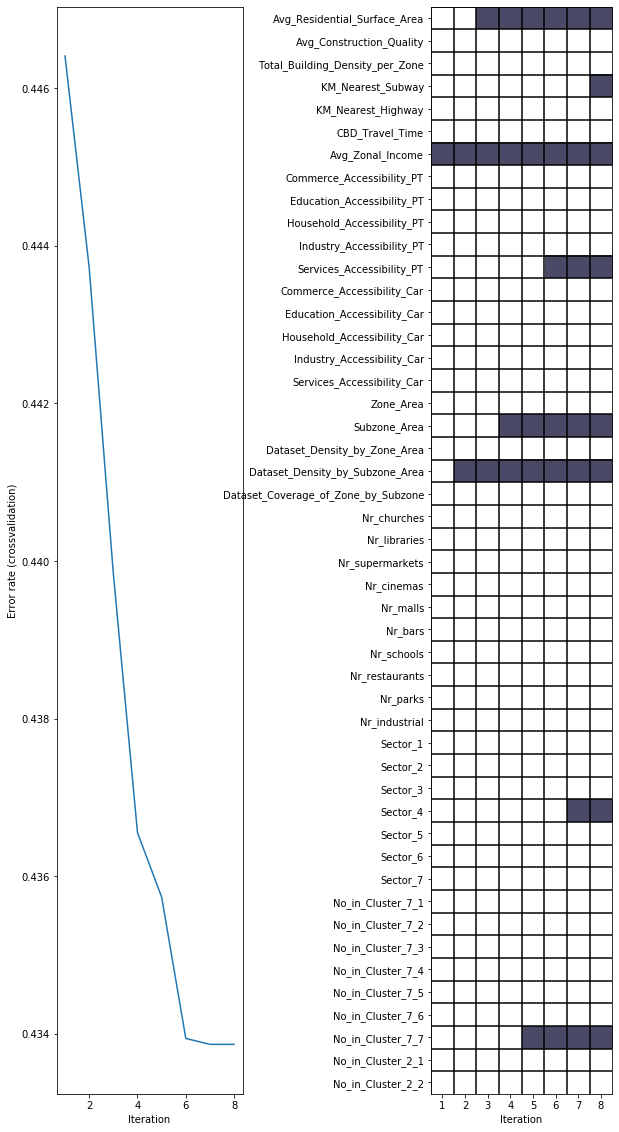

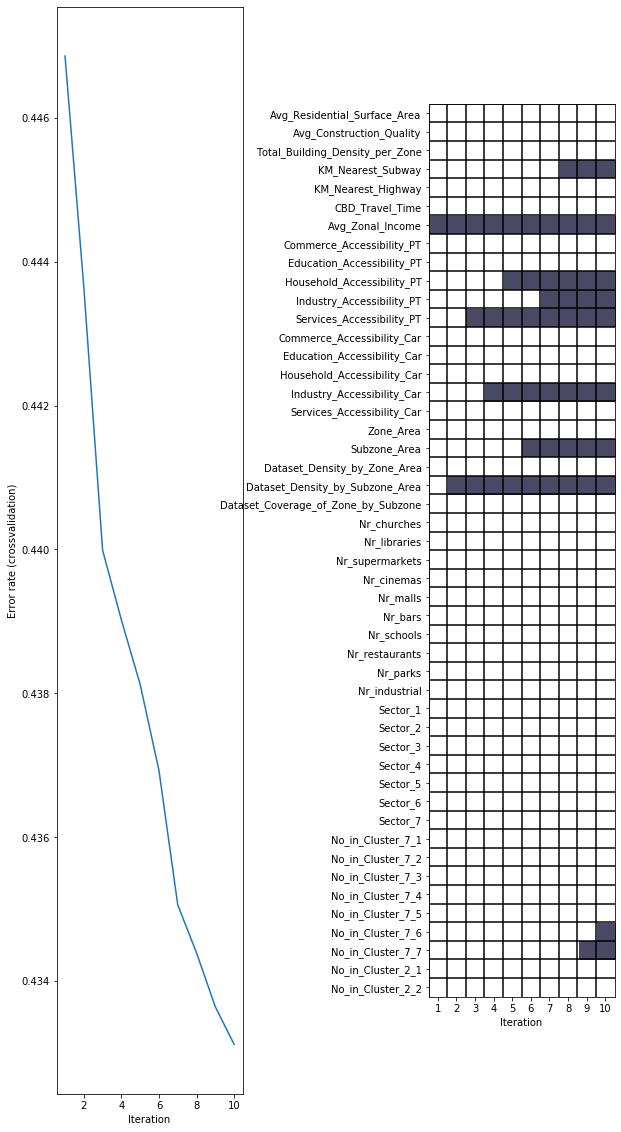

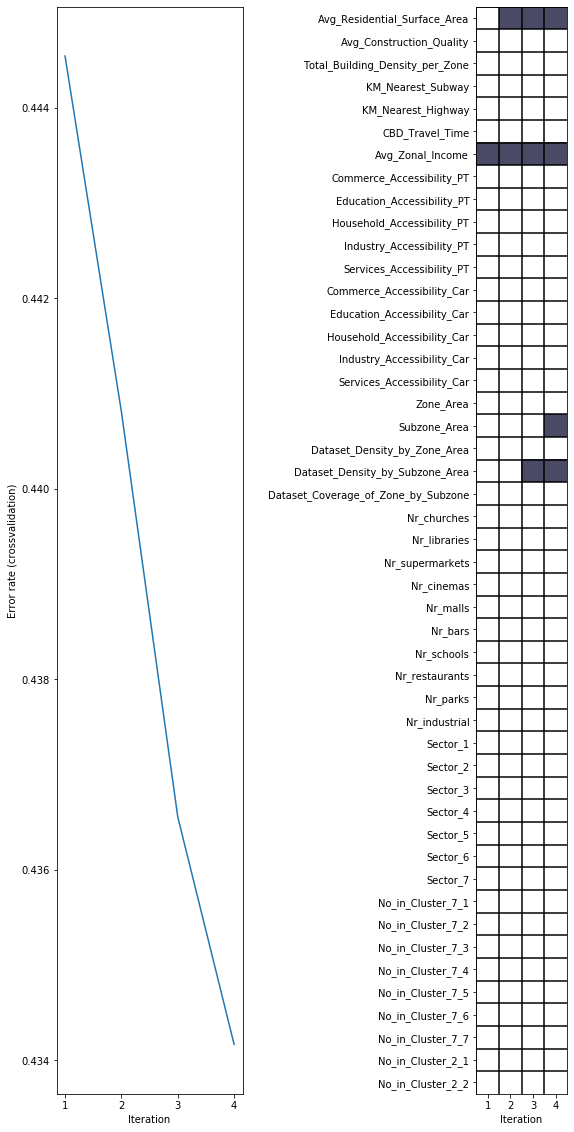

In [20]:
N, M = X.shape # we need the size of the training matrix for vector intializations 
attributeNames = list(train_df.columns) # This will allow us to visually display the names of our dataset variables

# Create crossvalidation partition for evaluation
K = 10
CV = model_selection.KFold(n_splits = K, shuffle = True)
internal_cross_validation = 10

# Initialize variables
Features = np.zeros((M, K))
Error_train = np.empty((K, 1))
Error_val = np.empty((K, 1))
Error_train_fs = np.empty((K, 1))
Error_val_fs = np.empty((K, 1))
Error_train_nofeatures = np.empty((K, 1))
Error_val_nofeatures = np.empty((K, 1))

k = 0 # Internal counter for first fold of CV 
for train_index, val_index in CV.split(X):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_val = X[val_index,:]
    y_val = y[val_index]
    
    # Compute error without using the input data at all (i.e. without using any features)
    baseline_class = np.argmax([-1, len(y[y == 1]), len(y[y == 2]), len(y[y == 3])]) # -1 is there only because we want to start counting from index 1 :)

    Error_train_nofeatures[k] = np.sum(y_train != baseline_class) / len(y_train)
    Error_val_nofeatures[k] = np.sum(y_val != baseline_class) / len(y_val)
    
    # Compute error with all features selected (no feature selection)
    m = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', n_jobs = -1).fit(X_train, y_train)
    
    Error_train[k] = np.sum(y_train != m.predict(X_train))/len(y_train)
    Error_val[k] = np.sum(y_val != m.predict(X_val))/len(y_val)

    # Compute error with feature subset selection
    textout = '';
    selected_features, features_record, loss_record = feature_selector_log_reg(X_train, y_train, internal_cross_validation, display = textout)
    Features[selected_features, k] = 1
    # .. alternatively, we could have used module sklearn.feature_selection
    
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).')
    else:
        m = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', n_jobs = -1).fit(X_train[:,selected_features], y_train)
        
        Error_train_fs[k] = np.sum(y_train != m.predict(X_train[:,selected_features]))/len(y_train)
        Error_val_fs[k] = np.sum(y_val != m.predict(X_val[:,selected_features]))/len(y_val)
    
        figure(k, figsize = [10, 20])
        plt.subplots_adjust(wspace = 1.0)
        subplot(1, 2, 1)
        plot(range(1, len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Error rate (crossvalidation)')    
        
        subplot(1,2,2)
        bmplot(attributeNames, range(1, features_record.shape[1]), -features_record[:, 1:])
        clim(-1.5, 0)
        xlabel('Iteration')
    k = k + 1

__Let us look, across all the 10 cross-validation folds, at which variables were selected to be representative of most of the variance in the model, _for each individual fold in part_.__

Each column in the below graph corresponds to one of the 10 iterations across the _outer fold_ of the cross-validation. If a variable has many grey boxes, it means that it was selected many times during the feature selection, and is very representative for classification within our dataset. If variables have been selected only once or twice across the whole 2-fold CV selection algorithm, we can assume that they are not bringing much new predictive power to our models.

<Figure size 432x288 with 0 Axes>

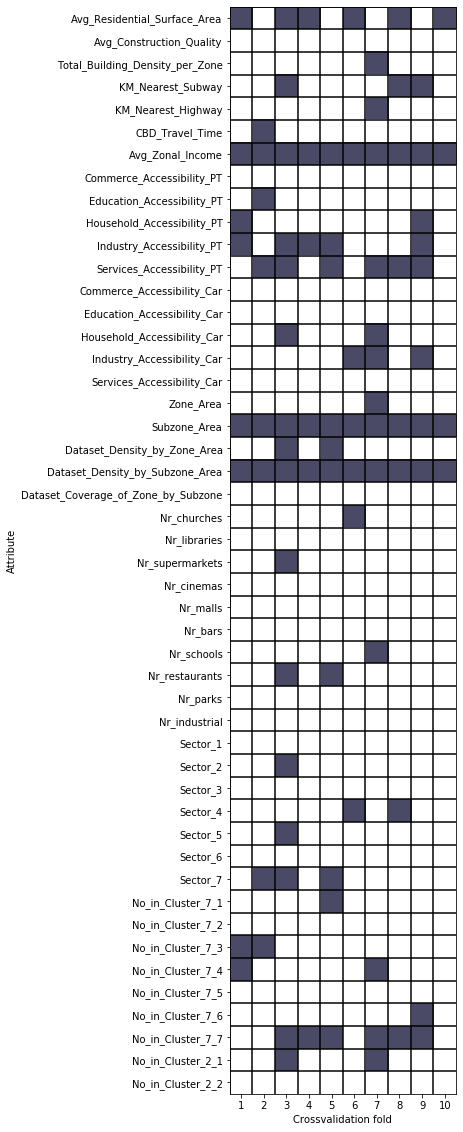

In [21]:
figure();
figure(k, figsize = [5, 20]);
bmplot(attributeNames, range(1,Features.shape[1] + 1), -Features);
clim(-1.5, 0);
xlabel('Crossvalidation fold');
ylabel('Attribute');

From the above results, we have an overall picture of which variables contribute more to explaining the dataset variance. We can see that __the top 3 most important variables for our model are: `Avg_Zonal_Income` and two of our self-engineered variables computed from the .dbf Zone shape files: `Subzone_Area` and `Dataset_Density_by_Subzone_Area`.__ 

Unfortunately, the graph above shows us that there are lots of variables which do not actually contribute significantly enough to lower the training and validation error for our models. _This is likely due to the large multicollinearity present in our dataset._

__One conclusion that we received from this feature selection test is that our categorical variables `No_in_Cluster_2`, `No_in_Cluster_7` and `Sector` are not very relevant during most of the cross-validation folds, even though we can see that they introduce a high dimensionality increase with their addition. Therefore, in order to balance out the dimensionality of our data while preserving relevant features, we have decided to leave them out of our final modeling of the data. Since they are categorical variables, we would also not include them directly in the PCA reduction, but would going the categorical dummy matrix with the PCA-applied numerical matrix at the end of the PCA step. By removing these variables, we are able to remove 16 unnecessary dimensions.__

Finally, we will compute the training and validation error values for both the full model without any feature selection and the newly-fitted feature-selected model, in order to see, when we perform the PCA dimensionality reduction, whether the scoring of the model has improved or not, and also to understand which variables contain most of the variance within the dataset. 

_We must mention that, for this feature selection, we have only used data from the geo-located training set, and have splitting this data further into training and validation sets by using the **cross-validation** technique._

In [22]:
# Display results
print('Logistic regression without feature selection: (when using all features)')
print('- Training error when using all features:       {0}'.format(Error_train.mean()))
print('- Validation error when using all features:     {0}'.format(Error_val.mean()))
print()
print('Logistic regression with feature selection:')
print('- Training error with FS:                       {0}'.format(Error_train_fs.mean()))
print('- Validation error with FS:                     {0}'.format(Error_val_fs.mean()))

Logistic regression without feature selection: (when using all features)
- Training error when using all features:       0.42837832844111273
- Validation error when using all features:     0.43378780976346976

Logistic regression with feature selection:
- Training error with FS:                       0.4311493038747276
- Validation error with FS:                     0.43432521819930436


#### Conclusion:

___Even though we have performed an extensive test within feature selection upon our dataset, we can clearly see from the error scores above that the differences between removing unnecessary features, or keeping all the initial ones in the model, is actually negligbile, and similar high error rates are being found in both situations.___

However, we argue that, since our dataset variables are so strongly correlated together, when we trained logistic regression models upon the non-PCA reduced dataset, most of the variance in the dataset was actually explained by much fewer dimensions than we project. Perhaps only 7 or 8 variables explain just as much as all our ~50 variables do now. 

_That is why we will move on and reduce the dimensionality of our data._

---

### _Part 4.3: Preparation of data for modeling using PCA_

It is a good idea to perform PCA on the whole dataset, and then separate into training and test sets, since, further on, the classifiers will be trained on data in the dimensional space defined by the principle components of the training data. It would not make sense to evaluate them in a new dimensional space corresponding to PCA done only upon the test set. Therefore, we should apply the same PCA transformation to the test data as we are doing to the training data, in order to stay within the exact same dimensional space.

___Since we also have some categorical variables with numerical structure, which will be one-hot-encoded further on, they will be left out of the PCA transformation. We will join the PCA-transformed set of data together with the encoded categorical variables at the end of processing.___

In [10]:
df = pd.read_csv('Households_Data_Processed.csv', index_col = 'Household_ID')
df = df[ML_columns]

In [11]:
#----------------------------------------This is not necessary anymore----------------------------------------#
# Casting these attributes as categories, so that they don't come into the correlation analysis
# df.Household_Type = df.Household_Type.astype('category')

# df.Sector = df.Sector.astype('category')
# df.No_in_Cluster_2 = df.No_in_Cluster_2.astype('category')
# df.No_in_Cluster_7 = df.No_in_Cluster_7.astype('category')
# df.Zone_Name = df.Zone_Name.astype('category')

# # We need to have them as integers to be able to compare them numerically
# temp_df.Lat = temp_df.Lat.astype('float')
# temp_df.Lon = temp_df.Lon.astype('float')

In [12]:
# Resetting the index makes finding the 0...n indexes of the training and test data much easier, as they will have the same locations even in matrix form
temp_df = df.reset_index().drop(columns = ['Household_ID', 'Household_Type', 'Sector', 'No_in_Cluster_2', 'No_in_Cluster_7', 'Zone_Name'])

test_indexes = temp_df[(temp_df.Lat >= -33.5) & (temp_df.Lat <= -33.4) & (temp_df.Lon >= -70.7) & (temp_df.Lon <= -70.6)].index.tolist()
train_indexes = temp_df[temp_df.index.isin(test_indexes) == False].index.tolist()

In [13]:
#----------------------------------------This is not necessary anymore----------------------------------------#
# temp_df = temp_df.select_dtypes(include = ['int64', 'float64']) # We have removed the categorical variables

In [14]:
temp_df.drop(['Lat', 'Lon'], axis = 1, inplace = True)

In [15]:
# We will transform the whole numerical subset of variables into a matrix form 
M = temp_df.as_matrix()

___Before we do PCA, we first need to standardize our data, since PCA tries to maximize the variance explained by each component, therefore it is necessary that no attributes have unfair advantage in being perceived as having larger variance only because of their larger scaling.___

In [16]:
# Now, we will standardize our data accordingly:
M = StandardScaler().fit_transform(M)

In [17]:
M

array([[ 0.09477389,  0.94556824, -0.73928573, ..., -1.38323692,
        -1.23804665, -0.91161535],
       [ 0.40304819,  0.94556824, -0.79742489, ..., -1.39449007,
        -1.23804665, -0.95275432],
       [ 0.39773312,  0.94556824, -0.86227241, ..., -1.42449847,
        -1.23804665, -1.44642201],
       ...,
       [-0.19755519,  0.36886136, -0.25404737, ...,  0.07404598,
        -1.09153942,  1.57729258],
       [-0.6068159 ,  1.00323893, -0.18249149, ...,  0.83550912,
         0.81305466,  0.06543529],
       [-0.95229571,  1.00323893, -0.30100592, ...,  0.8186294 ,
         0.81305466,  0.05515054]])

In [18]:
print('The number of numerical dimensions before PCA is:', M.shape[1])

The number of numerical dimensions before PCA is: 32


We are now ready to do PCA upon the numerical subset of variables. The sklearn library will compute how many components will be needed to preserve 95% of the variance in the data, and we will store that accordingly.

In [19]:
n_comp = PCA(0.95).fit_transform(M).shape[1]     # Gives you 11 components, a major reduction from the previous 32 dimensions
M = PCA(n_components = n_comp).fit_transform(M)

In [20]:
print('The number of numerical dimensions after PCA, while preserving 95% of the variance, is:', M.shape[1])

The number of numerical dimensions after PCA, while preserving 95% of the variance, is: 11


In [21]:
M

array([[ 7.4281674 ,  0.74192673,  0.05985633, ..., -0.02141419,
        -0.59541806, -0.08653887],
       [ 7.38732925,  0.75097355, -0.28689296, ..., -0.11736478,
        -1.29159406,  0.70391419],
       [ 8.81634523,  2.34706802,  0.59024796, ...,  0.47406734,
         1.32909809, -0.6865185 ],
       ...,
       [-1.06727051, -1.31416521, -0.05125852, ..., -0.27907476,
         0.33143243,  0.49166374],
       [-3.99098191, -1.38446923,  1.85006731, ..., -0.58026604,
         0.34134831,  1.67621171],
       [-2.83692232, -1.569636  , -0.50433771, ..., -0.40455446,
        -0.44439843, -0.15202791]])

In [22]:
# Let us now return and join the data transformed here together with some of the categorical data left out in this analysis.

# temp_df = df.reset_index().select_dtypes(include = ['category'])
# temp_df.drop(columns = ['Lat', 'Lon', 'Zone_Name', 'Household_Type'], inplace = True)

# temp_df = pd.get_dummies(temp_df) # Let us now one-hot encode the three categorical variables

# M_categ = temp_df.as_matrix()

# M = np.concatenate((M, M_categ), axis = 1) # Concatenate the matrices together by columns

In [23]:
print('The final shape of the dataset matrix is:', M.shape)

The final shape of the dataset matrix is: (17797, 11)


Finally, let us separate this common data matrix into the training and testing matrices, which will be used as feeding input to the supervised learning models:

In [24]:
X = M[train_indexes]
X_final_test = M[test_indexes]

In [25]:
print('The shape of the training data matrix is:', X.shape)
print('The shape of the test data matrix is:', X_final_test.shape)

The shape of the training data matrix is: (14876, 11)
The shape of the test data matrix is: (2921, 11)


Let us also store the vector for the target variable, retrieving its values very easily through the train_df and test_df separation, just as the one created at the beginning of this notebook. However, since we already have extracted the target variable when performing feature selection, we may simply reuse these vectors.

_Since this is a multiclass problm, we will need to store the target variable in two different forms: one is as a vector for inputting in Logistic Regression (and other sklearn models), and another is as a one-hot encoded categorical matrix, for inputting into the Neural-Network library Keras._

In [26]:
# We only do this here to show that, because of our previous extraction of the target variable for feature selection, we can now use it here
y = y 
y_final_test = y_final_test

y_keras = pd.get_dummies(y).as_matrix()
y_final_test_keras = pd.get_dummies(y_final_test).as_matrix()

---

<a id='logreg'></a>
## Part 5: _<u>Classification using Logistic Regression</u>_

Now, we will once again perform a classification upon our data using the ___Logistic Regression___ algorithm, however this time, the inputted data will not be the full initial data, but the matrix represented by the first 15 Principal Components, which explain ~95% of the data's variance. 

Let us explain the best practices used in modeling this functionality:
* __We have implemented 2-layer Cross-Validation for accurate and stable results of accuracy and F1 scores retrieved from inputting the data into the model.__ More specifically, 2-layer CV allows us to avoid the issues of random minimal error due to lucky selection of the sample in the validation or test sets. We must mention that all the train-test-validation splits performed across the 2-layer CV have been done taking data from the original geo-selected "training" set. Only after fully finishing the hyperparameter selection and model evaluation upon the CV'd data, we will perform a test on the actual geo-selected "test" data for our problem set.

* __We are testing for optimal hyperparameter selection within the inner folds of the Cross-Validation algorithm.__ For logistic regression, the only hyperparameter that we are tuning is the regularization parameter $\lambda$. Since we do not want our models to overfit on the training data, it is reasonable to use a penalty for the weights which allow large fluctuations of the final classification probablity results when their corresponding predictors change only slightly in value. That is why we decided to use the ridge (_L2_) regularization upon the Logistic Regression predictor weights, with the hyperparameter C being $1/\lambda$.

* __We try to find the optimal value for C or $\lambda$, by selecting a possible range for $\lambda$ between $10^{-5}$ and $10^5$__, and testing possible values by incrementing exponentially in powers of 10. After that, we will select the $\lambda$ value which has appeared most times in our final cross-validation outer folds, in order to train the "test" model on the final test data.

* Using our previously-defined __scoring method for accuracy and weighed-average macro F1 computation__, we will get relevant scores for checking the potential of prediction that our models have.

In [132]:
lambda_interval = np.power(10.,range(-5,5))

K1 = 10 # for model selection
K2 = 10 # for optimal parameter selection

# K-fold crossvalidation
CV1 = model_selection.KFold(n_splits = K1, shuffle = True)

# Initialize variable
logreg_test_acc_k1 = np.zeros(K1)
logreg_test_f1_k1 = np.zeros(K1)
optimal_lambda_selection_array = np.zeros(K1)

k1 = 0
for par_index, test_index in CV1.split(X, y):
    # extract training and test set for current CV fold
    X_par, y_par = X[par_index,:], y[par_index]
    X_test, y_test = X[test_index,:], y[test_index]
    
    CV2 = model_selection.KFold(n_splits = K2, shuffle = False)
    
    logreg_gen_acc = np.zeros(len(lambda_interval))
    logreg_gen_f1 = np.zeros(len(lambda_interval))
    
    for s in range(0, len(lambda_interval)):
        k2 = 0
        
        logreg_val_acc = np.zeros(K2)
        logreg_val_f1 = np.zeros(K2)
        
        for train_index, val_index in CV2.split(X_par, y_par):

            # extract training and test set for current CV fold
            X_train, y_train = X_par[train_index,:], y_par[train_index]
            X_val, y_val = X_par[val_index,:], y_par[val_index]
        
            logreg_model = LogisticRegression(penalty = 'l2', C = 1/lambda_interval[s], solver = 'lbfgs', multi_class='multinomial', n_jobs = -1) 
            logreg_model = logreg_model.fit(X_train, y_train)

            logreg_y_val_estimated = logreg_model.predict(X_val).T
            
            logreg_val_acc[k2] = evaluate(y_val, logreg_y_val_estimated, use_weighted_average = True)[0]
            logreg_val_f1[k2] = evaluate(y_val, logreg_y_val_estimated, use_weighted_average = True)[1]
            
            k2 = k2 + 1
        
        logreg_gen_acc[s] = np.sum(logreg_val_acc) / len(logreg_val_acc)
        logreg_gen_f1[s] = np.sum(logreg_val_f1) / len(logreg_val_f1)
       
    # logreg_min_error = np.max(logreg_gen_acc)
    logreg_min_error = np.max(logreg_gen_f1)
    
    #opt_lambda_index = np.argmax(logreg_gen_acc)
    opt_lambda_index = np.argmax(logreg_gen_f1)
    
    opt_lambda = lambda_interval[opt_lambda_index]
    
    # Store the optimal lambda in the array for frequency checking of best lambda later on
    optimal_lambda_selection_array[k1] = opt_lambda
    
    logreg_model = LogisticRegression(penalty = 'l2', C = 1/opt_lambda, solver = 'lbfgs', multi_class = 'multinomial', n_jobs = -1) 
    #logreg_model = LogisticRegression(penalty = 'l1', C = 1/opt_lambda, solver = 'saga', multi_class='multinomial')
    
    logreg_model = logreg_model.fit(X_par, y_par)
    logreg_y_test_estimated = logreg_model.predict(X_test).T
    
    logreg_test_acc_k1[k1] = evaluate(y_test, logreg_y_test_estimated, use_weighted_average = True)[0]
    logreg_test_f1_k1[k1] = evaluate(y_test, logreg_y_test_estimated, use_weighted_average = True)[1]
    
    print('Accuracy - regularized log-reg - CV1 fold {0}/{1}: {2}'.format(k1+1, K1, np.round(logreg_test_acc_k1[k1], decimals = 3)))
    print('F1 Score - regularized log-reg - CV1 fold {0}/{1}: {2}'.format(k1+1, K1, np.round(logreg_test_f1_k1[k1], decimals = 3)))
    print('Optimal lambda: {0}'.format(opt_lambda))
    print()
    k1 += 1

Accuracy - regularized log-reg - CV1 fold 1/10: 0.582
F1 Score - regularized log-reg - CV1 fold 1/10: 0.587
Optimal lambda: 100.0

Accuracy - regularized log-reg - CV1 fold 2/10: 0.552
F1 Score - regularized log-reg - CV1 fold 2/10: 0.558
Optimal lambda: 1.0

Accuracy - regularized log-reg - CV1 fold 3/10: 0.565
F1 Score - regularized log-reg - CV1 fold 3/10: 0.569
Optimal lambda: 100.0

Accuracy - regularized log-reg - CV1 fold 4/10: 0.556
F1 Score - regularized log-reg - CV1 fold 4/10: 0.559
Optimal lambda: 100.0

Accuracy - regularized log-reg - CV1 fold 5/10: 0.564
F1 Score - regularized log-reg - CV1 fold 5/10: 0.569
Optimal lambda: 1.0

Accuracy - regularized log-reg - CV1 fold 6/10: 0.574
F1 Score - regularized log-reg - CV1 fold 6/10: 0.577
Optimal lambda: 100.0

Accuracy - regularized log-reg - CV1 fold 7/10: 0.553
F1 Score - regularized log-reg - CV1 fold 7/10: 0.559
Optimal lambda: 1.0

Accuracy - regularized log-reg - CV1 fold 8/10: 0.549
F1 Score - regularized log-reg - CV

In [168]:
# Select the lambda which occurs most often in the frequency counting array
final_optimal_lambda = pd.Series(optimal_lambda_selection_array).value_counts().index[0]

logreg_model = LogisticRegression(penalty='l2', C = 1 / final_optimal_lambda, solver = 'lbfgs', multi_class='multinomial', n_jobs = -1)
logreg_model = logreg_model.fit(X_final_test, y_final_test)

accuracy, f1_score = evaluate(y_final_test, logreg_model.predict(X_final_test), print_confusion_matrix = True, use_weighted_average = True, print_accuracy = True, print_error_rate = True, print_f1_score = True)

Confusion matrix
- x-axis is true labels 
- y-axis is predicted labels
[[261 414  42]
 [165 824 277]
 [ 18 394 526]]

Accuracy:  0.55152
Error rate:  0.44848
F1 score:  0.55721


In [175]:
print('The trained regularized Logistic Regression model performs {0}% better in accuracy and {1}% in F1-scoring, compared to the primitive baseline model.'.format(np.round((accuracy - baseline_accuracy) * 100, decimals = 2), np.round((f1_score - baseline_f1_weigted_macro_avg) * 100, decimals = 2)))

The trained regularized Logistic Regression model performs 11.55% better in accuracy and 30.22% in F1-scoring, compared to the primitive baseline model.


#### Conclusion:

___As we can see above, even though we have tried to tune the regularization parameter most optimally and take additional measures to avoid overfitting (in which we succeeded), the model is able to perform only very slightly better, in terms of accuracy, compared to the baseline which systematically guesses and predicts only the most common class. However, in terms of F1-score, we argue that there has been a noticeable possitive difference in the precision and recall compared to random guessing, which also would be expected to be the case.___

---

<a id='rndfst'></a>
## Part 6: _<u>Classification using Decision Trees (through Random Forest)</u>_

Next, let us try to compare the performance of Logistic Regression model with another widely-used classification algorithm: Random Forests. This method is basically an ensemble of many Decision Tree models which fit on subsets of the inputted data and on subsets of features considered when splitting nodes. The algorithm will refer to majority voting from the many decision trees in order to decide on the final class of the evaluated entries.

Let us explain the best practices used in modeling this functionality:
* __Once again, overfitting needs to be considered when training the model. Random Forests are very susceptible to overfitting due to their splitting function's nature, which is why we make sure to control such a problem through the parameters of the maximum tree depth, also called _tree pruning_.__ This maximum depth is found using Cross-Validation, resulting in a more stable estimate of the parameter. Each Random Forest tree has been selected to have 100 estimators (decision trees) which will perform these computations.

* __We are using again the 2-layer Cross Validation method in order to estimate the generalization error of the model across multiple angles of our data__.

* Through the usage of our previously-defined __scoring method for accuracy and weighed-average macro F1 computation__, we will get relevant scores for checking the potential of prediction that our models have.

* It should be mentioned that Decision Trees (and implicitly this algorithm as well) are innately adapt at multi-class predictions of target variables from a dataset, since the method (_of splitting entries into separate nodes until they can safely predict the class within a node_) is inherently adapted for any number of possible classes within our data. We have tried (in our "backstage" analysis) to optimize hyperparameters relating to the minimum number of samples required to split an internal node (min_samples_split), the minimum number of samples required to be at a leaf node (min_samples_leaf) and the splitting criterion. From this, we concluded that the information gain measure gives us slightly more reliable results, while min_samples_split and min_samples_leaf can safely be used with their default values, as tuning these parameters has not made a sensible difference in our results.

In [27]:
randfst_tree_max_depth_interval = np.arange(20, 35, 1) # The maximum depth of the random forest individual tree models should be selected to be between 20 and 35

K1 = 10 # for model selection
K2 = 10 # for optimal parameter selection

# K-fold crossvalidation
CV1 = model_selection.KFold(n_splits = K1, shuffle = True)

# Initialize variable
randfst_test_acc_k1 = np.zeros(K1)
randfst_test_f1_k1 = np.zeros(K1)
optimal_max_tree_depth_selection_array = np.zeros(K1)

k1 = 0
for par_index, test_index in CV1.split(X, y):
    # extract training and test set for current CV fold
    X_par, y_par = X[par_index,:], y[par_index]
    X_test, y_test = X[test_index,:], y[test_index]
    
    CV2 = model_selection.KFold(n_splits = K2, shuffle = False)
    
    randfst_gen_acc = np.zeros(len(randfst_tree_max_depth_interval))
    randfst_gen_f1 = np.zeros(len(randfst_tree_max_depth_interval))
    
    for s in range(0, len(randfst_tree_max_depth_interval)):
            k2 = 0

            randfst_val_acc = np.zeros(K2)
            randfst_val_f1 = np.zeros(K2)

            for train_index, val_index in CV2.split(X_par, y_par):

                # extract training and test set for current CV fold
                X_train, y_train = X_par[train_index,:], y_par[train_index]
                X_val, y_val = X_par[val_index,:], y_par[val_index]

                randfst_model = RandomForestClassifier(criterion='entropy', max_depth = randfst_tree_max_depth_interval[s], min_samples_split = 2, min_samples_leaf = 3, n_estimators = 100, n_jobs = -1)
                randfst_model = randfst_model.fit(X_train, y_train)

                randfst_y_val_estimated = randfst_model.predict(X_val).T

                randfst_val_acc[k2] = evaluate(y_val, randfst_y_val_estimated, use_weighted_average = True)[0]
                randfst_val_f1[k2] = evaluate(y_val, randfst_y_val_estimated, use_weighted_average = True)[1]

                k2 = k2 + 1

            randfst_gen_acc[s] = np.sum(randfst_val_acc) / len(randfst_val_acc)
            randfst_gen_f1[s] = np.sum(randfst_val_f1) / len(randfst_val_f1)
       
    # randfst_min_error = np.max(randfst_gen_acc)
    randfst_min_error = np.max(randfst_gen_f1)
    
    # opt_max_tree_depth_index = np.argmax(randfst_gen_acc)
    opt_max_tree_depth_index = np.argmax(randfst_gen_f1)
    
    opt_max_tree_depth = randfst_tree_max_depth_interval[opt_max_tree_depth_index]
    
    # Store the optimal max tree depth for frequency checking of best tree depth later on
    optimal_max_tree_depth_selection_array[k1] = opt_max_tree_depth
    
    randfst_model = RandomForestClassifier(criterion='entropy', max_depth = opt_max_tree_depth, min_samples_split = 2, min_samples_leaf = 3, n_estimators = 100, n_jobs = -1)
   
    randfst_model = randfst_model.fit(X_par, y_par)
    randfst_y_test_estimated = randfst_model.predict(X_test).T
    
    randfst_test_acc_k1[k1] = evaluate(y_test, randfst_y_test_estimated, use_weighted_average = True)[0]
    randfst_test_f1_k1[k1] = evaluate(y_test, randfst_y_test_estimated, use_weighted_average = True)[1]
    
    print('Accuracy - regularized Random Forest - CV1 fold {0}/{1}: {2}'.format(k1+1, K1, np.round(randfst_test_acc_k1[k1], decimals = 3)))
    print('F1 Score - regularized Random Forest - CV1 fold {0}/{1}: {2}'.format(k1+1, K1, np.round(randfst_test_f1_k1[k1], decimals = 3)))
    print('Optimal maximum tree depth: {0}'.format(opt_max_tree_depth))
    print()
    k1 += 1

Accuracy - regularized Random Forest - CV1 fold 1/10: 0.558
F1 Score - regularized Random Forest - CV1 fold 1/10: 0.558
Optimal maximum tree depth: 34

Accuracy - regularized Random Forest - CV1 fold 2/10: 0.536
F1 Score - regularized Random Forest - CV1 fold 2/10: 0.539
Optimal maximum tree depth: 20

Accuracy - regularized Random Forest - CV1 fold 3/10: 0.542
F1 Score - regularized Random Forest - CV1 fold 3/10: 0.547
Optimal maximum tree depth: 28

Accuracy - regularized Random Forest - CV1 fold 4/10: 0.559
F1 Score - regularized Random Forest - CV1 fold 4/10: 0.562
Optimal maximum tree depth: 29

Accuracy - regularized Random Forest - CV1 fold 5/10: 0.556
F1 Score - regularized Random Forest - CV1 fold 5/10: 0.557
Optimal maximum tree depth: 25

Accuracy - regularized Random Forest - CV1 fold 6/10: 0.527
F1 Score - regularized Random Forest - CV1 fold 6/10: 0.529
Optimal maximum tree depth: 33

Accuracy - regularized Random Forest - CV1 fold 7/10: 0.545
F1 Score - regularized Rando

In [228]:
# Select the max tree depth which occurs most often in the frequency counting array
final_optimal_max_tree_depth = pd.Series(optimal_max_tree_depth_selection_array).value_counts().index[0]

randfst_model = RandomForestClassifier(criterion='entropy', max_depth = final_optimal_max_tree_depth, min_samples_split = 2, min_samples_leaf = 3, n_estimators = 100, n_jobs = -1)
randfst_model = randfst_model.fit(X, y)

accuracy, f1_score = evaluate(y_final_test, randfst_model.predict(X_final_test), print_confusion_matrix = True, use_weighted_average = True, print_accuracy = True, print_error_rate = True, print_f1_score = True)

Confusion matrix
- x-axis is true labels 
- y-axis is predicted labels
[[227 425  65]
 [289 700 277]
 [135 317 486]]

Accuracy:  0.48374
Error rate:  0.51626
F1 score:  0.4841


In [229]:
print('The trained Random Forest model performs {0}% better in accuracy and {1}% in F1-scoring, compared to the primitive baseline model.'.format(np.round((accuracy - baseline_accuracy) * 100, decimals = 2), np.round((f1_score - baseline_f1_weigted_macro_avg) * 100, decimals = 2)))

The trained Random Forest model performs 4.77% better in accuracy and 22.91% in F1-scoring, compared to the primitive baseline model.


#### Conclusion:

___From the results above, it appears that the Random Forest model has managed to perform slightly better than the baseline average when considering the F1-scoring, while only bringing a minimal improvement to the overall accuracy of the predictions. Interestingly, the performance presented here is lower than that of our logistic regression, even though both algorithms were tuned to an optimal state of selection, balancing approximation and flexibility.___

---

<a id='nn'></a>
## Part 7: _<u>Classification using Neural Networks</u>_

Lastly, we will try to perform better classification of our target variable and get better multiclass evaluation scores through the use of Deep Learning, more specifically through applying ___Neural Networks___ to the problem at hand. ___The major challenge in designing proper Neural Network models lies not only in the tuning of the hyper-parameters, but perhaps even more importantly,  in the architectural design of its hidden layers.___ We need to carefully select the number of nodes and number of hidden layers that will give us optimal prediction results for our model. We will use the help of the popular Deep Learning library __Keras__ to help us with that.

Let us explain the best practices used in modeling this functionality:
* __Once again, we are using 2-layer Cross-Validation for optimal selection of parameters and accuracy of generalization error computation.__ This time, within the outer fold, there will be multiple consequent inner CV folds, one for each parameter that we are trying to optimally select. __We will find out, in this way, the best number of nodes and layers necessary to build up our NN architecture, as well as the optimal percentage of nodes that should be 'dropped' in a Dropout neural layer.__

* __The Keras NN model has been selected to use a loss function for `categorical_crossentropy` with a `softmax` final layer activation function.__ This is because our problem is a multi-classification one, which requires these functions to give out the best estimate of prediction of the target variable. The number of epochs for each trained Neural Network has been set to 500, which means that we go over the training data again and again 500 times using Gradient Descent, trying to find a point of minima for our loss functions. The training will be done in batches of 2048 elements.

* __The network will be preventing overfitting by using Dropout neural layers, which deactivate a random percentage of neurons by setting their weights to zero.__ We should normally select a Dropout rate of 0.2-0.5 in order to let the regularization have an effect upon on the network without under-learning its features.

* __Since the Keras fitting model has an additional parameter which allows you to set your validation data directly when you train your model upon the training data, we will use the 2-layer CV in a slightly different way than before.__ More specifically, in the previous two algorithms, we have used the inner CV layers to find optimal parameter values using a validation set (taken from the training set) and the outer CV layers to compute an reliable generalization error upon the test data (again, taken from the training set). Now, since Keras allows us to provide both training and validation data in "one go", we will do so, and the purpose of the inner-CV layers will be to find the optimal parameters which give the _maximal categorical accuracy_ upon the test data (taken from the training set) directly. Consequently, the purpose of the outer CV layers is now to find, step-by-step, the most optimal architecture and hyperparameters of the NN and, finally, to compute the accuracy of this optimal NN model upon our geo-separated final test data. This is now done directly within the outer layer CV fold, whereas in the previous two models, we have done it after the crossvalidation function has exited.

In [36]:
# In order to train a Neural Network using Keras, the target variable should not be a vector, but a categorical encoding matrix of the classes of the target variable
y = y_keras
y_final_test = y_final_test_keras

In [42]:
node_interval = [1, 5, 10, 20, 30, 40, 50, 100, 200]
layer_interval = [1, 2, 3, 4, 5]
dropout_percentage_interval = [0.2, 0.25, 0.35, 0.45, 0.5]

num_epochs = 500
batch_size = 2048

K1 = 5 # for generalization accuracy computation
K2 = 5 # for optimal parameter selection

CV1 = model_selection.KFold(n_splits = K1, shuffle = True)
CV2 = model_selection.KFold(n_splits = K2, shuffle = False)

NN_gen_acc = np.zeros(K1)
optimal_n_node_selection_array = np.zeros(K1)
optimal_n_layer_selection_selection_array = np.zeros(K1)
optimal_dropout_selection_array = np.zeros(K1)

k1 = 0
for par_index, test_index in CV1.split(X, y):
    print('Computing CV1 indexing fold: {0}/{1}'.format(k1 + 1, K1))

    X_par, y_par = X[par_index,:], y[par_index, :]
    X_test, y_test = X[test_index,:], y[test_index, :]
    
    NN_node_acc = np.zeros(len(node_interval))
    
    for node_i in range(len(node_interval)):
        NN_node_val_acc = np.zeros(K2)
        k2 = 0
        
        for train_index, val_index in CV2.split(X_par, y_par):
            X_train, y_train = X_par[train_index,:], y_par[train_index, :]
            X_val, y_val = X_par[val_index,:], y_par[val_index, :]
        
            model = Sequential()
            model.add(Dense(units = node_interval[node_i], input_dim = X_train.shape[1], activation = 'relu'))
            model.add(Dense(units = y_train.shape[1], activation = 'softmax'))

            model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])
            history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = num_epochs, batch_size = batch_size, verbose = 0)

            NN_node_val_acc[k2] = history.model.evaluate(X_test, y_test, verbose = 0)[1]
            print('NN node Validation Accuracy, fold {0} with node number {1}, {2}%'.format(k2 + 1, node_interval[node_i], np.round(100 * NN_node_val_acc[k2], decimals = 2)))
            k2 = k2 + 1
            
        NN_node_acc[node_i] = np.sum(NN_node_val_acc) / len(NN_node_val_acc)
    
    best_node_nr = node_interval[np.argmax(NN_node_acc)]
    optimal_n_node_selection_array[k1] = best_node_nr
    print()
    
    
    NN_layer_acc = np.zeros(len(layer_interval))
    
    for layer_j in range(len(layer_interval)):
        NN_layer_val_acc = np.zeros(K2)
        k2 = 0
        
        for train_index, val_index in CV2.split(X_par, y_par):
            X_train, y_train = X_par[train_index,:], y_par[train_index, :]
            X_val, y_val = X_par[val_index,:], y_par[val_index, :]
        
            model = Sequential()
            model.add(Dense(units = best_node_nr, input_dim = X_train.shape[1], activation = 'relu'))
            for j in range(1, layer_interval[layer_j]):
                model.add(Dense(units = best_node_nr, activation = 'relu'))
            model.add(Dense(units = y_train.shape[1], activation = 'softmax'))

            model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])
            history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = num_epochs, batch_size = batch_size, verbose = 0)

            NN_layer_val_acc[k2] = history.model.evaluate(X_test, y_test, verbose = 0)[1]
            print('NN layer Validation Accuracy, fold {0} with node number {1}, layer number {2}, {3}%'.format(k2 + 1, best_node_nr, layer_interval[layer_j], np.round(100 * NN_layer_val_acc[k2], decimals = 2)))
            k2 = k2 + 1
            
        NN_layer_acc[layer_j] = np.sum(NN_layer_val_acc) / len(NN_layer_val_acc)
    
    best_layer_nr = layer_interval[np.argmax(NN_layer_acc)]
    optimal_n_layer_selection_selection_array[k1] = best_layer_nr
    print()
    
    
    NN_dropout_acc = np.zeros(len(dropout_percentage_interval))
    
    for dropout_perc_l in range(len(dropout_percentage_interval)):
        NN_dropout_val_acc = np.zeros(K2)
        k2 = 0
        
        for train_index, val_index in CV2.split(X_par, y_par):
            X_train, y_train = X_par[train_index,:], y_par[train_index, :]
            X_val, y_val = X_par[val_index,:], y_par[val_index, :]
        
            model = Sequential()
            
            model.add(Dense(units = best_node_nr, input_dim = X_train.shape[1], activation = 'relu'))
            model.add(Dropout(rate = dropout_percentage_interval[dropout_perc_l]))
            
            for j in range(1, best_layer_nr):
                model.add(Dense(units = best_node_nr, activation = 'relu'))
                model.add(Dropout(rate = dropout_percentage_interval[dropout_perc_l]))
            
            model.add(Dense(units = y_train.shape[1], activation = 'softmax'))

            model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])
            history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = num_epochs, batch_size = batch_size, verbose = 0)

            NN_dropout_val_acc[k2] = history.model.evaluate(X_test, y_test, verbose = 0)[1]
            print('NN dropout Validation Accuracy, fold {0} with node number {1}, layer number {2}, dropout rate {3}, {4}%'.format(k2 + 1, best_node_nr, best_layer_nr, dropout_percentage_interval[dropout_perc_l], np.round(100 * NN_dropout_val_acc[k2], decimals = 2)))
            k2 = k2 + 1
            
        NN_dropout_acc[dropout_perc_l] = np.sum(NN_dropout_val_acc) / len(NN_dropout_val_acc)
    
    best_dropout_percentage_nr = dropout_percentage_interval[np.argmax(NN_dropout_acc)]
    optimal_dropout_selection_array[k1] = best_dropout_percentage_nr
    print()
    
    
    model = Sequential()
    model.add(Dense(units = best_node_nr, input_dim = X_par.shape[1], activation = 'relu'))
    model.add(Dropout(rate = best_dropout_percentage_nr))
    for j in range(1, best_layer_nr):
        model.add(Dense(units = best_node_nr, activation = 'relu'))
        model.add(Dropout(rate = best_dropout_percentage_nr))
    model.add(Dense(units = y_par.shape[1], activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])
    history = model.fit(X_par, y_par, validation_data = (X_test, y_test), epochs = num_epochs, batch_size = batch_size, verbose = 0)

    NN_gen_acc[k1] = history.model.evaluate(X_final_test, y_final_test, verbose = 0)[1]
    print()
    print('NN generalization accuracy on the final test set, with node number {0}, layer number {1}, dropout rate {2}, {3}%'.format(best_node_nr, best_layer_nr, best_dropout_percentage_nr, np.round(100 * NN_gen_acc[k1], decimals = 2)))
    print()
    print()
    print()
    k1 = k1 + 1

Computing CV1 indexing fold: 1/5
NN node Validation Accuracy, fold 1 with node number 1, 43.75%
NN node Validation Accuracy, fold 2 with node number 1, 55.31%
NN node Validation Accuracy, fold 3 with node number 1, 49.8%
NN node Validation Accuracy, fold 4 with node number 1, 55.04%
NN node Validation Accuracy, fold 5 with node number 1, 54.47%
NN node Validation Accuracy, fold 1 with node number 5, 56.38%
NN node Validation Accuracy, fold 2 with node number 5, 56.38%
NN node Validation Accuracy, fold 3 with node number 5, 56.82%
NN node Validation Accuracy, fold 4 with node number 5, 56.75%
NN node Validation Accuracy, fold 5 with node number 5, 55.75%
NN node Validation Accuracy, fold 1 with node number 10, 57.43%
NN node Validation Accuracy, fold 2 with node number 10, 56.85%
NN node Validation Accuracy, fold 3 with node number 10, 55.75%
NN node Validation Accuracy, fold 4 with node number 10, 56.25%
NN node Validation Accuracy, fold 5 with node number 10, 55.41%
NN node Validation

In [47]:
# Select the optimal parameters from the CV information retrieved above
final_optimal_n_nodes = int(pd.Series(optimal_n_node_selection_array).value_counts().index[0])
final_optimal_n_layers = int(pd.Series(optimal_n_layer_selection_selection_array).value_counts().index[0])
final_optimal_dropout = pd.Series(optimal_dropout_selection_array).value_counts().index[0]

model = Sequential()
model.add(Dense(units = final_optimal_n_nodes, input_dim = X.shape[1], activation = 'relu'))
model.add(Dropout(rate = final_optimal_dropout))
for j in range(1, final_optimal_n_layers):
    model.add(Dense(units = final_optimal_n_nodes, activation = 'relu'))
    model.add(Dropout(rate = final_optimal_dropout))
model.add(Dense(units = y.shape[1], activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])
history = model.fit(X, y, epochs = num_epochs, batch_size = batch_size, verbose = 0)

In [77]:
# This function converts the predicted probabilities for the target variable of X_final_test_keras, 
# from a matrix with 3 columns representing the individual probabilities of an entry being that class, 
# into a 1-dimensional vector (exactly the y_pred that we need for our 'evaluate' function) representing the predicted class from the NN model

y_pred = np.apply_along_axis(lambda row: np.argmax(row) + 1, axis = 1, arr = model.predict(X_final_test))
print(y_pred)

y_final_test = np.apply_along_axis(lambda row: np.argmax(row) + 1, axis = 1, arr = y_final_test)
print(y_final_test)

[2 2 2 ... 1 1 1]
[2 2 2 ... 1 2 2]


In [78]:
accuracy, f1_score = evaluate(y_final_test, y_pred, print_confusion_matrix = True, use_weighted_average = True, print_accuracy = True, print_error_rate = True, print_f1_score = True)

Confusion matrix
- x-axis is true labels 
- y-axis is predicted labels
[[263 422  32]
 [440 619 207]
 [262 255 421]]

Accuracy:  0.44608
Error rate:  0.55392
F1 score:  0.46184


In [79]:
print('The trained Neural Network model performs {0}% better in accuracy and {1}% in F1-scoring, compared to the primitive baseline model.'.format(np.round((accuracy - baseline_accuracy) * 100, decimals = 2), np.round((f1_score - baseline_f1_weigted_macro_avg) * 100, decimals = 2)))

The trained Neural Network model performs 1.01% better in accuracy and 20.68% in F1-scoring, compared to the primitive baseline model.


#### Conclusion:


___Based on the results above, it appears that, even though we have tried to tune our Neural Network architecture most optimally and avoid over-fitting through proper use of Dropout layers, the NN model performed the worst of the three in terms of accuracy, managing minimal improvements in accuracy compared to the baseline. The F1-score is increased, compared to the baseline, however it has the lowest improvement out of all the three models.___

<a id='ending'></a>
## Part 8: _<u>Conclusion</u>_

___As a conclusion to our ML Predictive Analytics notebook, we have modeled, inputted, predicted and classified the data using supervised machine learning algorithm through the proper implementation and selection of relevant parameters for a multiclass classification problem.___

__In regards to the predictive performance of our models presented in this notebook, we have the following final results:__

__I. Baseline model__, computed from always predicting using the most frequent class within the dataset:
* Accuracy: _43.6%_ (baseline)
* F1-score: _25.5%_ (baseline)

__II. Logistic Regression model__, regularized (RIDGE) and optimized:
* Accuracy: _55.1%_ (<font color="green">+11.55%</font>) 
* F1-score: _55.7%_ (<font color="green">+30.22%</font>) 

__III. Random Forest model__, pruned and optimized:
* Accuracy: _48.3%_ (<font color="orange">+4.77%</font>)
* F1-score: _48.4%_ (<font color="orange">+22.91%</font>)

__IV. Neural Network model__, using Sequential architecture, built upon Keras and using Tensorflow backend, regularized and optimized:
* Accuracy: _44.6%_ (<font color="red">+1.01%</font>)
* F1-score: _46.1%_ (<font color="red">+20.68%</font>)

Compared to the baseline model, all of the trained supervised learning algorithms bring an improvement to the prediction of household buyer types within the Santiago market, which can be seen through both scoring and accuracy increases for all the three models. However, the improvements are rather small compared to the minimal value, especially when looking at accuracy levels across all three of the dataset classes. 

In terms of model results comparison, regularized Logistic Regression model is clearly the winner here, which is the only model managing to bring into play a double-digit increase in both accuracy and F1 score. The Neural Network results are particularly surprising, being in the bottom of our leaderboard. Interestingly, by looking at the above results, we can see that that the network performed better in terms of categorical accuracy when trained on only a subset of the model (which we had by doing CV), giving accuracy upon the final test set of about +5% higher than the ending one.

These results show and confirm that the geo-spatial problem at hand is of deep complexity, and cannot be solved easily without harvesting more data and especially more relevant attributes which can account for the class separation while being uniformly distributed both across the training set (outskirts of Santiago) and testing set (in its central zone).

---

_Group Workload Distribution:_

- _Part 1: Shalaka_
- _Part 2: Sebastian_
- _Part 3: Shalaka, Sebastian_
- _Part 4: Sebastian, Blanca_
- _Part 5: Blanca, Shalaka_
- _Part 6: Blanca_
- _Part 7: Sebastian, Shalaka_
- _Part 8: Sebastian_